In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

Mounted at /content/drive


In [2]:
# 2. Đọc file csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DIG Historical Data.csv')

In [3]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]
df1=df.reset_index()['Price']

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(len(df1)) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 115ms/step - loss: 0.0114 - val_loss: 8.7164e-04
Epoch 2/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0013 - val_loss: 1.8933e-04
Epoch 3/100
16/16 [==============================] - 1s 54ms/step - loss: 6.1373e-04 - val_loss: 1.4977e-04
Epoch 4/100
16/16 [==============================] - 1s 52ms/step - loss: 5.1810e-04 - val_loss: 2.0796e-04
Epoch 5/100
16/16 [==============================] - 1s 55ms/step - loss: 5.2127e-04 - val_loss: 2.2503e-04
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 4.9920e-04 - val_loss: 1.3610e-04
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 4.3026e-04 - val_loss: 1.4172e-04
Epoch 8/100
16/16 [==============================] - 1s 84ms/step - loss: 4.0182e-04 - val_loss: 1.5514e-04
Epoch 9/100
16/16 [==============================] - 2s 101ms/step - loss: 3.9644e-04 - val_loss: 1.2507e-04
Epoch 10/100
16/16 [==============

In [11]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

12/12 [==============================] - 0s 13ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [13]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 21932.302019993716


In [14]:
x_input = test_data[len(test_data)-time_step:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


[[0.27859124541282654], [0.28083372116088867], [0.28265973925590515], [0.28430867195129395], [0.28589120507240295], [0.28745037317276], [0.2890017330646515], [0.29055219888687134], [0.29210612177848816], [0.29366686940193176], [0.29523730278015137], [0.2968200743198395], [0.29841697216033936], [0.30002957582473755], [0.30165916681289673], [0.3033067584037781], [0.3049730956554413], [0.3066588342189789], [0.30836448073387146], [0.3100902736186981], [0.31183674931526184], [0.31360408663749695], [0.3153924345970154], [0.31720200181007385], [0.3190329670906067], [0.32088524103164673], [0.32275891304016113], [0.3246541917324066], [0.3265710175037384], [0.32850927114486694], [0.3304689824581146], [0.33245015144348145], [0.334452748298645], [0.3364766240119934], [0.33852168917655945], [0.3405879735946655], [0.3426751494407654], [0.344783216714859], [0.3469119668006897], [0.34906113147735596], [0.3512307405471802], [0.3534204661846161], [0.3556300401687622], [0.35785943269729614], [0.360108137

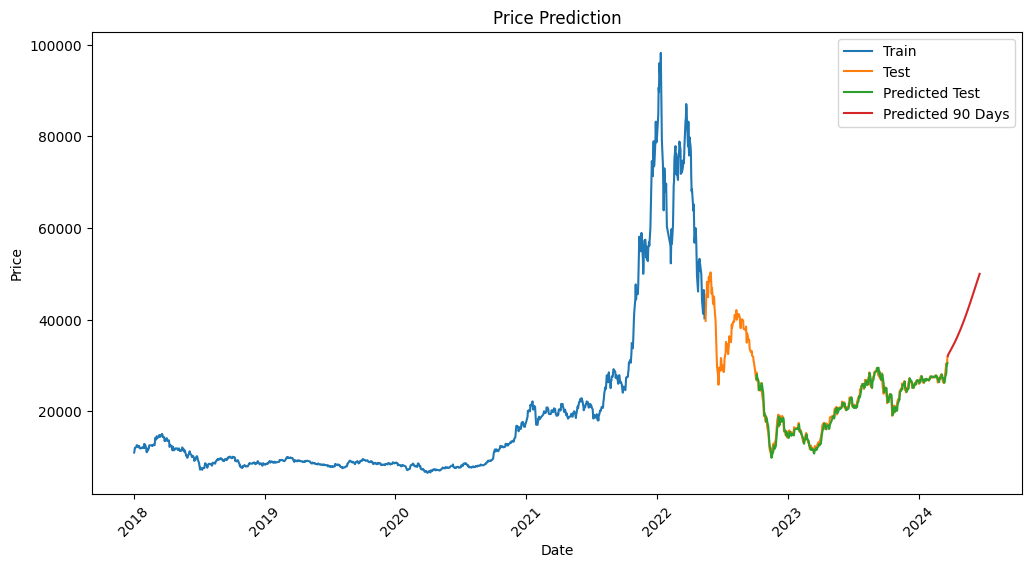

In [15]:
plt.figure(figsize=(12,6))

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot train data
train_dates = df['Date'][:train_size]
plt.plot(train_dates, scaler.inverse_transform(train_data), label='Train')

# Plot test data
test_dates = df['Date'][train_size:train_size + test_size]
plt.plot(test_dates, scaler.inverse_transform(test_data), label='Test')

# Plot predictions for test data
test_predict_dates = df['Date'][train_size + time_step:train_size + time_step + len(y_pred)]
plt.plot(test_predict_dates, y_pred, label='Predicted Test')

# Predict next 30 days
last_date = df['Date'].iloc[-1]
predict_30_days_dates = pd.date_range(start=last_date, periods=90)
plt.plot(predict_30_days_dates, scaler.inverse_transform(lst_output), label='Predicted 90 Days')

# Formatting the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Prediction')
plt.xticks(rotation=45)
plt.show()
